In [2]:
import numpy as np
import matplotlib.pyplot as plt

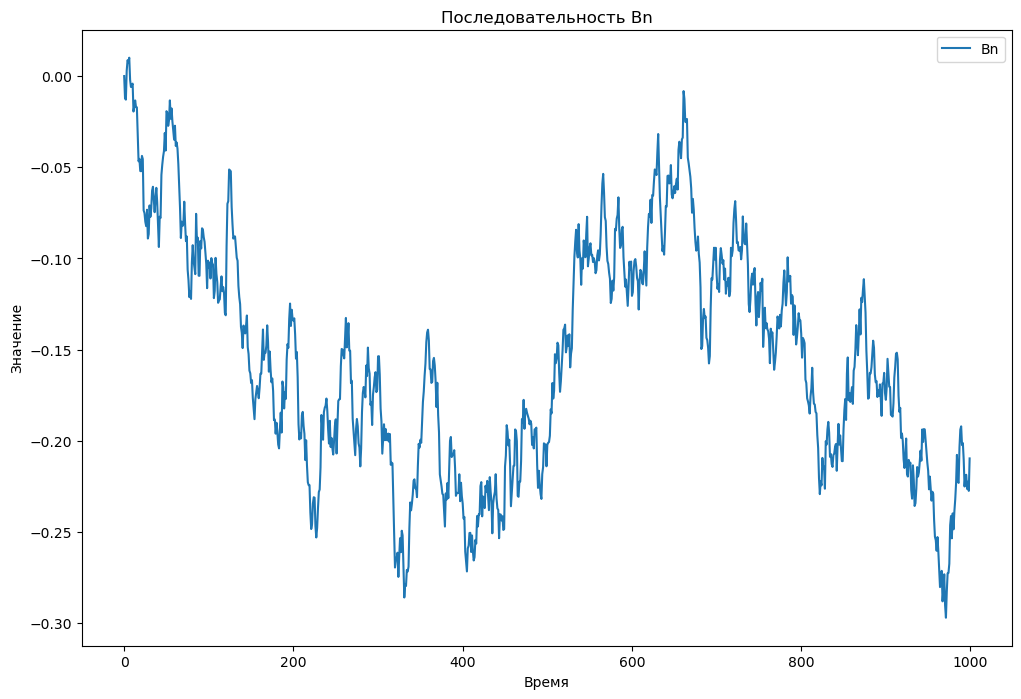

In [140]:
#  2. Замоделировать процесс (8) 

k = 10**3

def B(k):
    B = np.zeros(k)
    B[0] = 0
    for k in range(1,k):
        B[k] = B[k-1] + np.random.normal(0,0.01)
    return B

result = B(k)

plt.figure(figsize=(12, 8))
plt.plot(result, label = "Bk")
plt.title("Последовательность Bk")
plt.ylabel("Значение")
plt.xlabel("Время")
plt.legend()
plt.show()

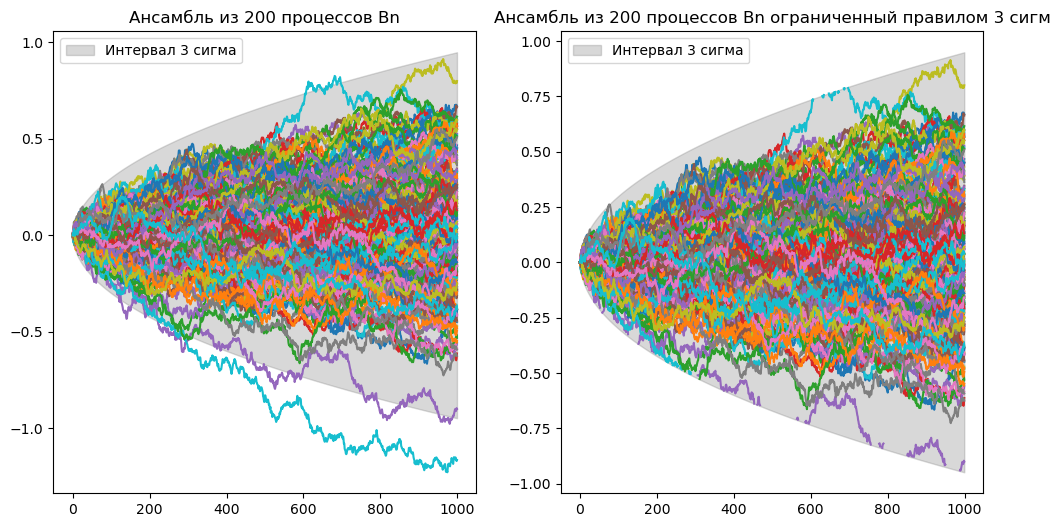

In [142]:
# 3. Построить ансамбль реализаций процесса, замоделированного на преды
# дущем шаге, и вывести все реализации процесса на один график. Т.е.
# построить 200 реализаций процесса (8) на одном графике
k_index = np.arange(k)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
first = axes[0]
second = axes[1]

for i in range(200):
    np.random.seed(i)
    first.plot(B(k)) 
    
first.fill_between( 
    range(k), 
    - 3*np.sqrt(k_index) * 0.01,
    + 3*np.sqrt(k_index) * 0.01, 
    color="gray", 
    alpha=0.3, 
    label="Интервал 3 сигма" 
) 
first.set_title("Ансамбль из 200 процессов Bk")
first.legend()

# 4 ограничить по правилу трех сигм
for i in range(200):
    np.random.seed(i)
    bufer = B(k)
    mask = (bufer <= (3*np.sqrt(k_index)*0.01)) & (bufer >= (- 3*np.sqrt(k_index) * 0.01))
    bufer = np.where(mask, bufer, np.nan)
    second.plot(bufer)

second.fill_between( 
    range(k), 
    - 3*np.sqrt(k_index) * 0.01,
    + 3*np.sqrt(k_index) * 0.01, 
    color="gray", 
    alpha=0.3, 
    label="Интервал 3 сигма" 
) 
second.set_title("Ансамбль из 200 процессов Bk ограниченный правилом 3 сигм")
second.legend()

plt.show()

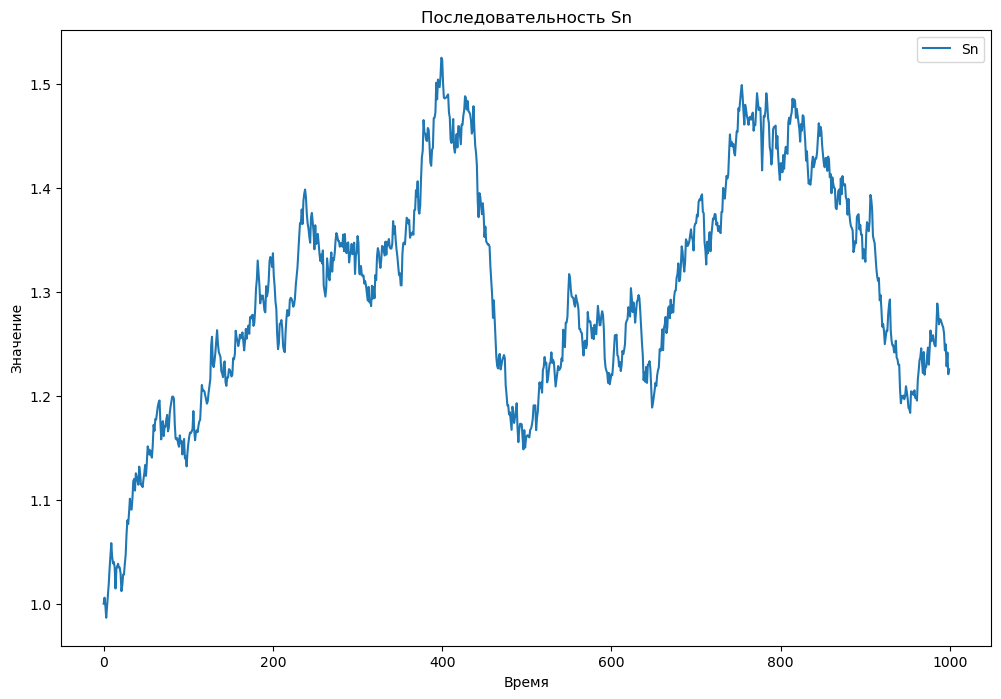

In [150]:
# 5. Реализовать процесс (9) при следующих входных значениях параметров:
# S0 = 1, a =0.5,sigma = 0.9, √delta =0.01, k= 1:10^3  

def S(t):
    sigma = 0.9
    a = 0.5
    S = np.zeros(t)
    So = 1
    B_RES = B(t)
    for k in range(t):
        S[k] = So*np.exp((a-((sigma**2)/2))*(k+1)*0.0001 + sigma*B_RES[k])
    return S

result = S(k)

plt.figure(figsize=(12, 8))
plt.plot(result, label = "Sk")
plt.title("Последовательность Sk")
plt.ylabel("Значение")
plt.xlabel("Время")
plt.legend()
plt.show()

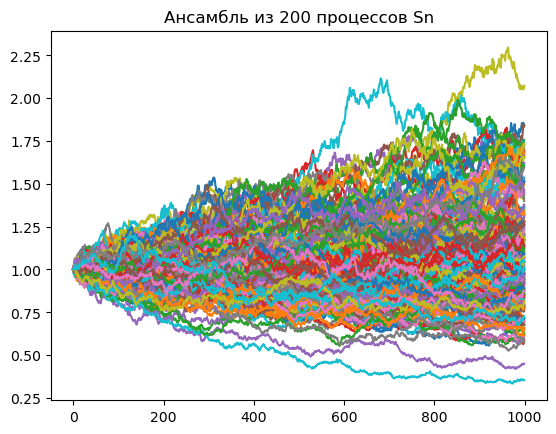

In [158]:
# 6. Построить ансамбль реализаций процесса, 200 на графике

for i in range(200):
    np.random.seed(i)
    plt.plot(S(k)) 

plt.title("Ансамбль из 200 процессов Sk")
plt.show()